# Load Packages and Data

In [108]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

assets = pd.read_csv('/home/Portfolio_2.csv',header='infer',index_col='Date') 

In [109]:
assets.head(5)

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX
Date,,,,,,,,
2015-04-01,549.489990,81.669998,59.017143,370.260010,73.779182,139.591400,81.300003,31.535204
2015-04-02,541.309998,81.559998,59.154285,372.250000,74.233482,140.882874,81.120003,32.055969
2015-04-06,543.950012,82.440002,60.330002,377.040009,74.900414,141.691223,80.980003,32.287418
2015-04-07,544.859985,82.320000,60.494286,374.410004,74.136803,141.022232,80.580002,32.104183
2015-04-08,548.840027,82.279999,63.049999,381.200012,75.084068,141.226639,83.529999,32.046318


In [ ]:
assets.tail(5) 

# Calculate Daily Returns 

In [110]:
returns = (assets/assets.shift(1))-1
returns.head()

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX
Date,,,,,,,,
2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-02,-0.014887,-0.001347,0.002324,0.005375,0.006158,0.009252,-0.002214,0.016514
2015-04-06,0.004877,0.010790,0.019875,0.012868,0.008984,0.005738,-0.001726,0.007220
2015-04-07,0.001673,-0.001456,0.002723,-0.006975,-0.010195,-0.004721,-0.004940,-0.005675
2015-04-08,0.007305,-0.000486,0.042247,0.018135,0.012777,0.001449,0.036610,-0.001802


# Check Distribution of Returns

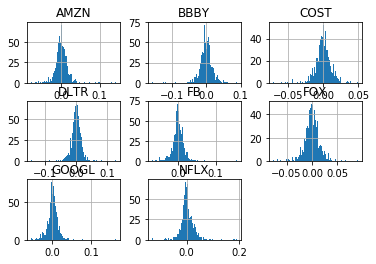

In [111]:
returns.hist(bins=100)
plt.show()

# Calculate Log Returns

In [112]:
log_returns = np.log((assets/assets.shift(1)))

In [ ]:
log_returns.head()

In [113]:
log_returns.mean()*252

GOOGL    0.212306
FB       0.224318
NFLX     0.538202
AMZN     0.455631
BBBY    -0.420122
COST     0.100268
DLTR     0.051696
FOX      0.047673
dtype: float64

# Covariance Matrix

In [114]:
log_returns.cov()*252

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX
GOOGL,0.051703,0.037923,0.040084,0.037761,0.006759,0.014809,0.017474,0.016526
FB,0.037923,0.063865,0.041359,0.041199,0.006268,0.012379,0.015795,0.018267
NFLX,0.040084,0.041359,0.174764,0.048329,0.011944,0.016129,0.022053,0.023956
AMZN,0.037761,0.041199,0.048329,0.077447,0.004387,0.013007,0.015140,0.020239
BBBY,0.006759,0.006268,0.011944,0.004387,0.099406,0.016719,0.031556,0.020358
COST,0.014809,0.012379,0.016129,0.013007,0.016719,0.034535,0.021681,0.011282
DLTR,0.017474,0.015795,0.022053,0.015140,0.031556,0.021681,0.079864,0.018325
FOX,0.016526,0.018267,0.023956,0.020239,0.020358,0.011282,0.018325,0.060808


# Correlation Matrix

In [115]:
log_returns.corr()

,GOOGL,FB,NFLX,AMZN,BBBY,COST,DLTR,FOX
GOOGL,1.000000,0.659948,0.421682,0.596727,0.094283,0.350461,0.271933,0.294732
FB,0.659948,1.000000,0.391481,0.585806,0.078667,0.263593,0.221170,0.293131
NFLX,0.421682,0.391481,1.000000,0.415408,0.090621,0.207611,0.186670,0.232387
AMZN,0.596727,0.585806,0.415408,1.000000,0.050001,0.251497,0.192502,0.294913
BBBY,0.094283,0.078667,0.090621,0.050001,1.000000,0.285347,0.354165,0.261850
COST,0.350461,0.263593,0.207611,0.251497,0.285347,1.000000,0.412833,0.246201
DLTR,0.271933,0.221170,0.186670,0.192502,0.354165,0.412833,1.000000,0.262965
FOX,0.294732,0.293131,0.232387,0.294913,0.261850,0.246201,0.262965,1.000000


# Random Weights via Monte Carlo Method

In [ ]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var


def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result    


## Optimization - Minimum Volatility

In [ ]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result